In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:05<00:00, 209MB/s]
100% 812M/812M [00:05<00:00, 162MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [7]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ",file_count)


Number of images:  25000


In [9]:
file_name = os.listdir('/content/train')
print(file_name)

['dog.4404.jpg', 'cat.1290.jpg', 'cat.5349.jpg', 'cat.43.jpg', 'cat.5542.jpg', 'cat.1248.jpg', 'cat.651.jpg', 'dog.4977.jpg', 'cat.1893.jpg', 'cat.89.jpg', 'cat.1614.jpg', 'cat.6855.jpg', 'dog.1260.jpg', 'cat.5886.jpg', 'cat.5491.jpg', 'cat.6700.jpg', 'cat.10795.jpg', 'cat.5681.jpg', 'dog.12385.jpg', 'dog.6493.jpg', 'dog.1280.jpg', 'dog.6784.jpg', 'dog.2716.jpg', 'cat.4286.jpg', 'cat.11028.jpg', 'cat.8090.jpg', 'cat.11897.jpg', 'cat.3644.jpg', 'dog.5411.jpg', 'dog.9804.jpg', 'cat.11499.jpg', 'cat.5921.jpg', 'dog.7815.jpg', 'cat.3404.jpg', 'dog.8746.jpg', 'dog.11279.jpg', 'dog.11856.jpg', 'dog.445.jpg', 'cat.3581.jpg', 'cat.1350.jpg', 'dog.4047.jpg', 'dog.1099.jpg', 'dog.11330.jpg', 'dog.8388.jpg', 'dog.4624.jpg', 'dog.1343.jpg', 'dog.5276.jpg', 'cat.324.jpg', 'cat.3743.jpg', 'dog.10545.jpg', 'cat.8285.jpg', 'cat.9302.jpg', 'dog.12368.jpg', 'cat.11765.jpg', 'cat.4720.jpg', 'cat.997.jpg', 'dog.7635.jpg', 'dog.3365.jpg', 'dog.11077.jpg', 'cat.8898.jpg', 'cat.6987.jpg', 'cat.4024.jpg', 'ca

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

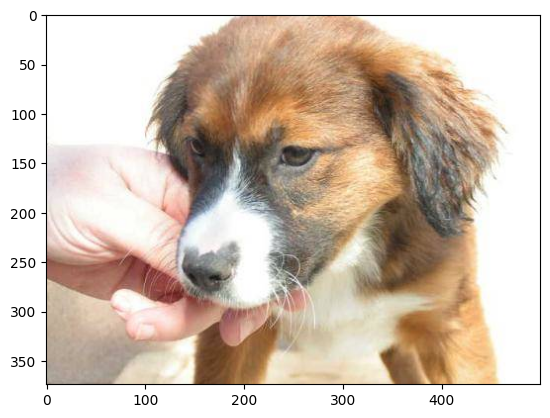

In [41]:
img = mpimg.imread('/content/train/dog.4404.jpg')
plt.imshow(img)


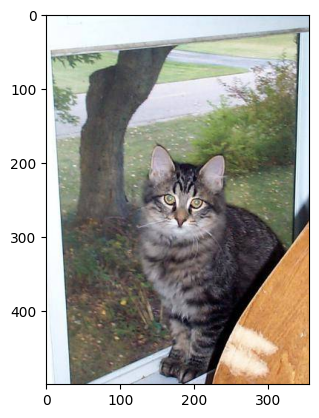

In [16]:
img = mpimg.imread('/content/train/cat.43.jpg')
plt.imshow(img)


In [21]:
file_name = os.listdir('/content/train')

for i in range(5):
  name = file_name[i]
  # print(name)
  print(name[0:3])

dog
cat
cat
cat
cat


In [24]:
file_name = os.listdir('/content/train')

dog_count = 0
cat_count = 0
for img_file in file_name:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images: ",dog_count)
print("Number of cat images: ", cat_count)

Number of dog images:  12500
Number of cat images:  12500


In [32]:
#creating a directory for resized images

In [26]:
os.mkdir('/content/image resized')

In [31]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")

  newImgPath = resized_folder + filename
  img.save(newImgPath)

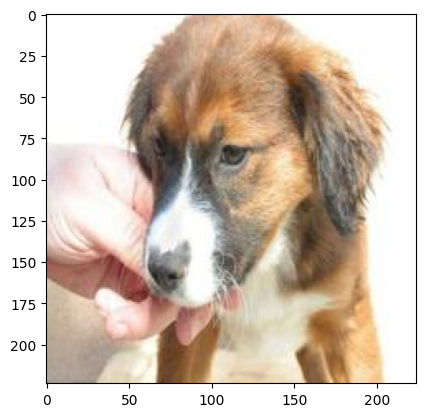

In [42]:
#display resized dog images

img = mpimg.imread('/content/image resized/dog.4404.jpg')
plt.imshow(img)
plt.show()

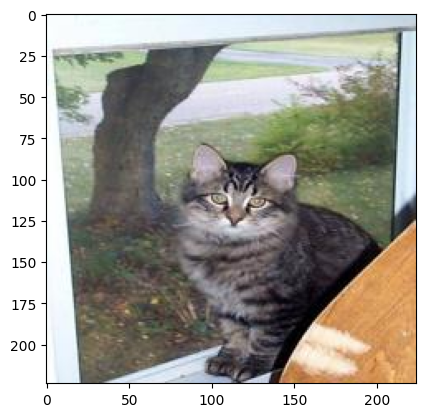

In [39]:
img = mpimg.imread('/content/image resized/cat.43.jpg')
plt.imshow(img)


###Creating labels for reseized images of dogs and cats

Cat->0

Dog->1

In [44]:

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [46]:
print(filenames[0:5])
print(len(filenames))

['dog.4404.jpg', 'cat.1290.jpg', 'cat.5349.jpg', 'cat.43.jpg', 'cat.5542.jpg']
2000


In [50]:
print(labels[0:5])

print(len(labels))

[1, 0, 0, 0, 0]
2000


In [51]:
# counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 981 1019]


In [52]:
#Converting all the resized images to numpy arrays


In [53]:
import cv2
import glob

In [54]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files=[]
[files.extend(glob.glob(image_directory + '*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [55]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[151 162 170]
   [155 166 174]
   [157 168 176]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[148 157 166]
   [149 158 167]
   [150 159 168]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[143 152 161]
   [141 150 159]
   [141 150 159]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[158 163 162]
   [122 127 126]
   [147 149 149]
   ...
   [ 82  89  74]
   [ 85  95  79]
   [ 79  89  73]]

  [[200 205 204]
   [169 174 173]
   [151 153 153]
   ...
   [ 84  91  76]
   [ 84  94  78]
   [ 78  88  72]]

  [[191 196 195]
   [191 196 195]
   [167 169 169]
   ...
   [ 87  94  79]
   [ 84  91  76]
   [ 78  85

In [56]:
type(dog_cat_images)

numpy.ndarray

In [57]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [58]:
X = dog_cat_images
Y = np.asarray(labels)

In [60]:
#Train test split

In [61]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [62]:
print(X.shape, X_train.shape, X_test.shape)


(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> training images

400 -> test images

In [63]:
#Scaling data between 0-1


In [64]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [65]:
print(X_train_scaled)

[[[[0.21176471 0.14901961 0.17647059]
   [0.21960784 0.15686275 0.18431373]
   [0.22352941 0.16862745 0.18431373]
   ...
   [0.2627451  0.22745098 0.23921569]
   [0.2627451  0.22745098 0.23921569]
   [0.2627451  0.22745098 0.23921569]]

  [[0.22745098 0.16470588 0.19215686]
   [0.22745098 0.17254902 0.19607843]
   [0.23137255 0.17647059 0.19215686]
   ...
   [0.25882353 0.22352941 0.23529412]
   [0.25490196 0.21960784 0.23137255]
   [0.25490196 0.21960784 0.23137255]]

  [[0.23137255 0.17647059 0.2       ]
   [0.22352941 0.17647059 0.2       ]
   [0.22352941 0.18039216 0.19215686]
   ...
   [0.24705882 0.21176471 0.22352941]
   [0.24313725 0.20784314 0.21960784]
   [0.24313725 0.20784314 0.21960784]]

  ...

  [[0.01960784 0.         0.00392157]
   [0.01960784 0.         0.00392157]
   [0.01568627 0.00784314 0.00784314]
   ...
   [0.63137255 0.61176471 0.6       ]
   [0.62352941 0.60392157 0.59215686]
   [0.61568627 0.59607843 0.58431373]]

  [[0.03137255 0.01176471 0.01568627]
   [0.0

In [66]:
#Building the Neural Network


In [67]:
import tensorflow as tf
import tensorflow_hub as hub

In [68]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [70]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [71]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [72]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.1985 - acc: 0.9231
Epoch 2/5
50/50 [==============================] - 64s 1s/step - loss: 0.0709 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 79s 2s/step - loss: 0.0573 - acc: 0.9794
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0458 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 68s 1s/step - loss: 0.0382 - acc: 0.9919


In [73]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss =',score)
print("Test Accuracy =",acc)

13/13 [==============================] - 21s 2s/step - loss: 0.0559 - acc: 0.9775
Test Loss = 0.05586795508861542
Test Accuracy = 0.9775000214576721


Path of the image to be predicted: /content/dog.jpg


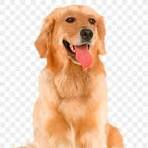

1/1 [==============================] - 1s 774ms/step
[[-2.7755709  2.3865135]]
1
The image represents a Dog


In [75]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)  #Checks max probability

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


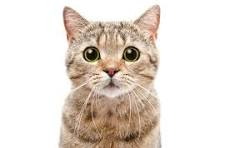

1/1 [==============================] - 0s 55ms/step
[[ 3.288456  -2.8569121]]
0
The image represents a Cat


In [76]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)  #Checks max probability

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')